In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.style.use("./../code/plotting.mplstyle")
import numpy as np
import h5py
from scipy.special import gammainc
from scipy import interpolate

import sys
sys.path.append('./../code')
from makeCorner import plot_corner
from custom_distributions import *

Load the summary file containing output of our inference of the BBH population.

In [2]:
hdata = h5py.File("O5_CBC_GWB_detectable_MD.hdf","r")
    
# List groups and datasetes
print("\nGroups:")
print(hdata.keys())

print("\nData sets inside ['posterior']:")
print(hdata['posterior'].keys())


Groups:
<KeysViewHDF5 ['posterior']>

Data sets inside ['posterior']:
<KeysViewHDF5 ['R_ref', 'Zmax', 'alpha', 'bq', 'kappa', 'log_dmMax', 'log_dmMin', 'log_f_peak', 'logsig_chi', 'mMax', 'mMin', 'min_log_neff', 'mu_chi', 'mu_m1', 'nEff_inj_per_event', 'sig_cost', 'sig_m1', 'td_min']>


The different `hdata['posterior/']` datasets correspond to the following:

| Name      | Description |
| :---------- | :---------- |
| `R_ref`     | The comoving BBH merger rate at $m_1=20\,M_\odot$ and $z=0.2$, in units $\mathrm{Gpc}^{-3} \mathrm{yr}^{-1}$  |
| `td_min`     | Minimum time-delay value in units Gyrs |
| `kappa`     | Slope of the time-delay distribution |
| `Zmax`     | The threshold metallicity below which star formation occurs in units $Z_\odot$ |
| `alpha` | Power-law index of the "power law" part our primary mass model |
| `mu_m1` | Mean of the Gaussian peak in our primary mass model |
| `sig_m1` | Standard deviation of the Gaussian peak in our primary mass model |
| `log_f_peak` | Log10 of the fraction of BBHs comprising the Gaussian peak, rather than the power law |
| `mMin` | Mass below which the primary mass distribution goes to zero |
| `mMax` | Mass above which the primary mass distribution goes to zero |
| `log_dmMin` | Log10 of the scale length over which the primary mass distribution is smoothly sent to zero below `mMin` |
| `log_dmMax` | Log10 of the scale length over which the primary mass distribution is smoothly sent to zero above `mMax` |
| `bq` | Power-law index governing the mass ratio distribution |
| `kappa` | This is the power-law index governing growth of the merger rate, assumed to evolve as $(1+z)^\kappa$ |
| `mu_chi` | Mean of the component spin magnitude distribution |
| `logsig_chi` | Log10 of the standard deviation of component spin magnitudes |
| `sig_cost` | Standard deviation of the component (cosine) spin-tilt distributions. Mean is assumed to the 1 for simplicity |
| `nEff_inj_per_event` | Number of effective injections per event informing our Monte Carlo estimate of detection efficiency |
| `min_log_neff` | For each posterior sample, minimum (log10) number of effective posterior samples informing our Monte Carlo estimates of each event's likelihood, taken over all events |

Make corner plots of all these quantities.
There are a lot of parameters, so split them across a few corner plots.
First, parameters describing masses:

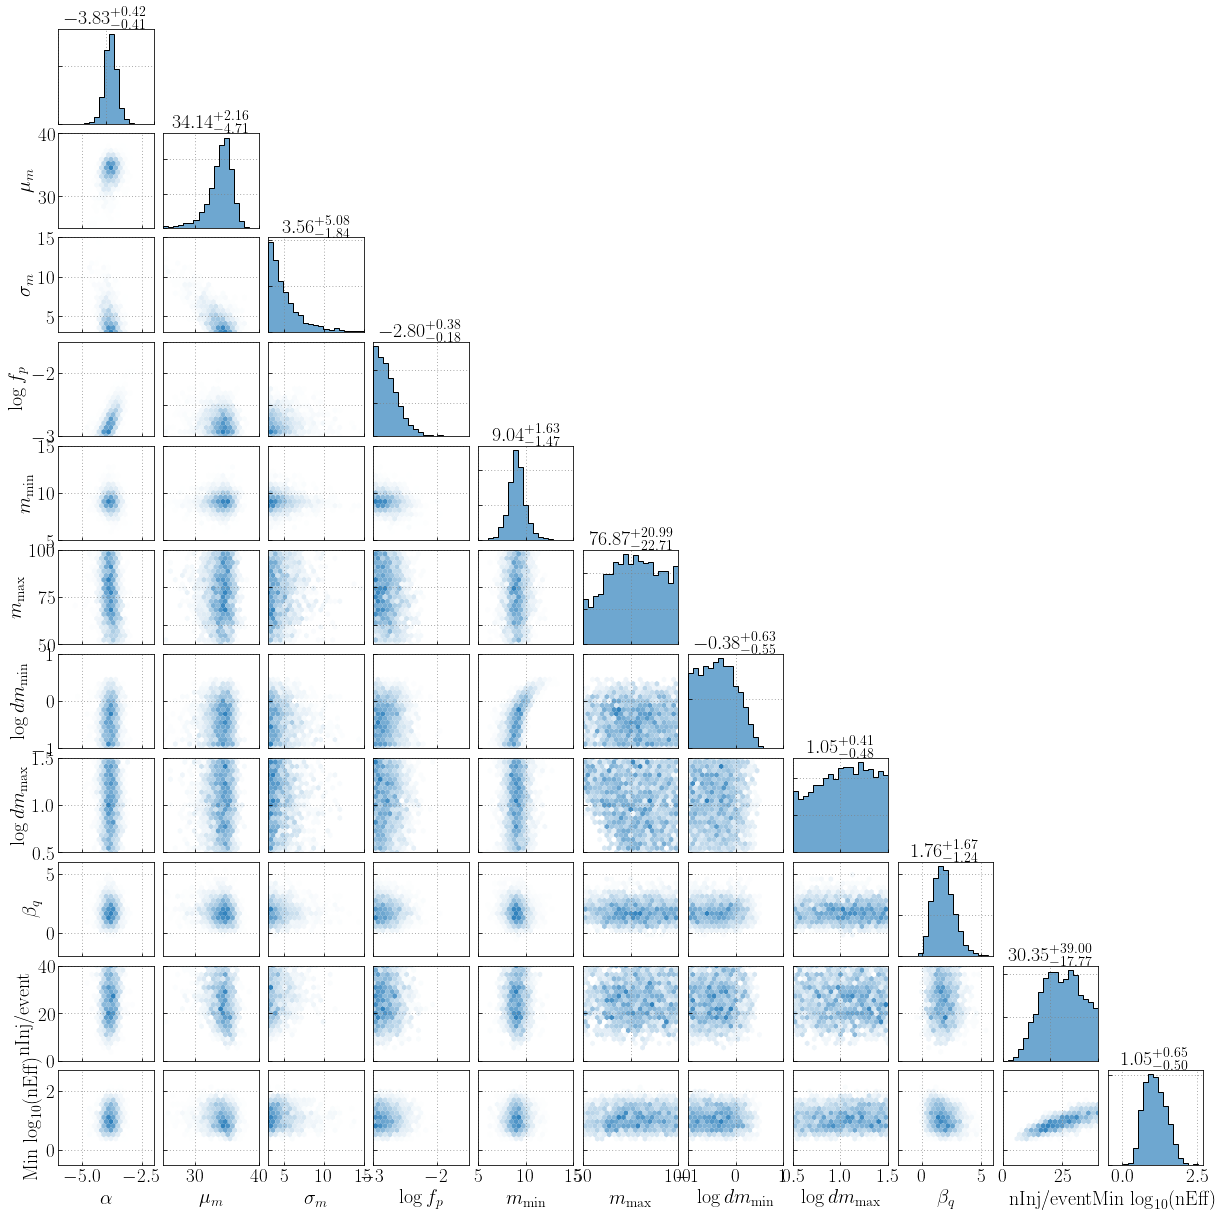

In [3]:
plot_data = {
    'alpha':{'data':hdata['posterior/alpha'][()],'plot_bounds':(-6,-2),'label':r'$\alpha$'},
    'mu_m1':{'data':hdata['posterior/mu_m1'][()],'plot_bounds':(25,40),'label':r'$\mu_m$'},
    'sig_m1':{'data':hdata['posterior/sig_m1'][()],'plot_bounds':(3,15),'label':r'$\sigma_m$'},
    'log_f_peak':{'data':hdata['posterior/log_f_peak'][()],'plot_bounds':(-3,-1.5),'label':r'$\log f_p$'},
    'mMin':{'data':hdata['posterior/mMin'][()],'plot_bounds':(5,15),'label':r'$m_\mathrm{min}$'},
    'mMax':{'data':hdata['posterior/mMax'][()],'plot_bounds':(50,100),'label':r'$m_\mathrm{max}$'},
    'log_dmMin':{'data':hdata['posterior/log_dmMin'][()],'plot_bounds':(-1,1),'label':r'$\log dm_\mathrm{min}$'},
    'log_dmMax':{'data':hdata['posterior/log_dmMax'][()],'plot_bounds':(0.5,1.5),'label':r'$\log dm_\mathrm{max}$'},
    'bq':{'data':hdata['posterior/bq'][()],'plot_bounds':(-2,6),'label':r'$\beta_q$'},
    'neff':{'data':hdata['posterior/nEff_inj_per_event'][()],'plot_bounds':(0,40),'label':r'nInj/event'},
    'min_neff':{'data':hdata['posterior/min_log_neff'][()],'plot_bounds':(-0.5,2.7),'label':r'Min $\log_{10}$(nEff)'},
}

fig = plt.figure(figsize=(17,17))
plot_corner(fig,plot_data,'#3182bd')
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

Next, parameters governing spin:

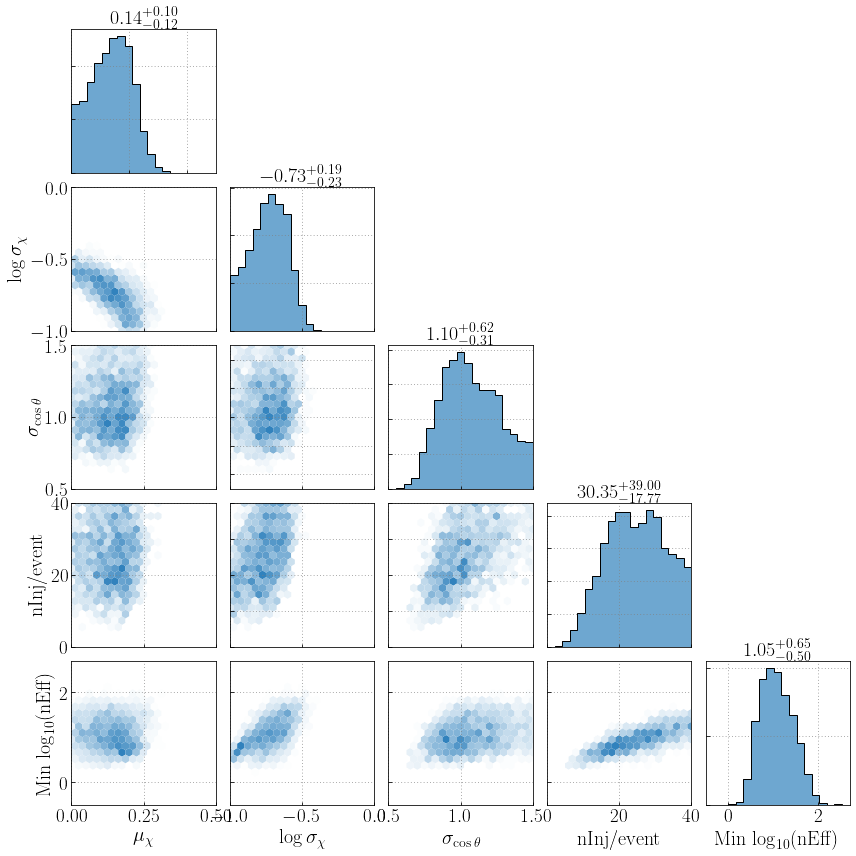

In [4]:
plot_data = {
    'mu_chi':{'data':hdata['posterior/mu_chi'][()],'plot_bounds':(0,0.5),'label':r'$\mu_\chi$'},
    'logsig_chi':{'data':hdata['posterior/logsig_chi'][()],'plot_bounds':(-1,0),'label':r'$\log\sigma_\chi$'},
    'sig_cost':{'data':hdata['posterior/sig_cost'][()],'plot_bounds':(0.5,1.5),'label':r'$\sigma_{\cos\theta}$'},
    'neff':{'data':hdata['posterior/nEff_inj_per_event'][()],'plot_bounds':(0,40),'label':r'nInj/event'},
    'min_neff':{'data':hdata['posterior/min_log_neff'][()],'plot_bounds':(-0.5,2.7),'label':r'Min $\log_{10}$(nEff)'},
}

fig = plt.figure(figsize=(12,12))
plot_corner(fig,plot_data,'#3182bd')
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

And the merger rate and its evolution with redshift:

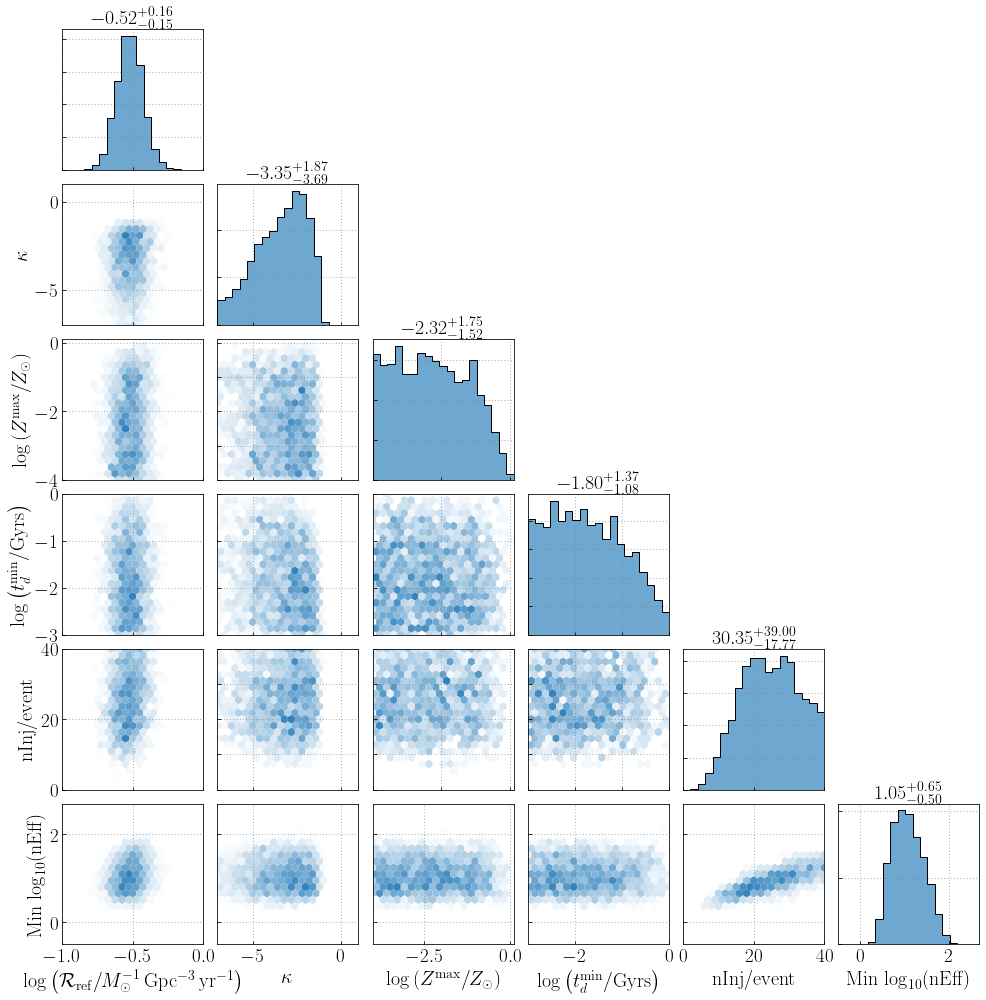

In [5]:
plot_data = {
    "Rref":{"data":np.log10(hdata['posterior/R_ref'][()]),"plot_bounds":(-1,0),"label":r"$\log \left(\mathcal{R}_{\rm ref}/M_\odot^{-1}\,{\rm Gpc^{-3}}\,{\rm yr^{-1}}\right)$"},    "kappa":{"data":hdata['posterior/kappa'][()],"plot_bounds":(-7,1),"label":r"$\kappa$"},
    "Zmax":{"data":np.log10(hdata['posterior/Zmax'][()]),"plot_bounds":(-4,0.1),"label":r"$\log \left(Z^{\rm max}/Z_\odot\right)$"},
    "td_min":{"data":np.log10(hdata['posterior/td_min'][()]),"plot_bounds":(-3,0),"label":r"$\log \left(t_d^{\rm min}/{\rm Gyrs}\right)$"},
    'neff':{'data':hdata['posterior/nEff_inj_per_event'][()],'plot_bounds':(0,40),'label':r'nInj/event'},
    'min_neff':{'data':hdata['posterior/min_log_neff'][()],'plot_bounds':(-0.5,2.7),'label':r'Min $\log_{10}$(nEff)'},
}

fig = plt.figure(figsize=(14,14))
plot_corner(fig,plot_data,'#3182bd')
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

Let's plot the actual measured distributions of BBH parameters:

### 1. Primary mass

We show the merger rate *per unit primary mass* $\frac{d\mathcal{R}}{dm_1}$ again evaluated at $z=0.2$ and $m_1=20$ M$_\odot$ integrated over spin degrees of freedom and secondary mass:

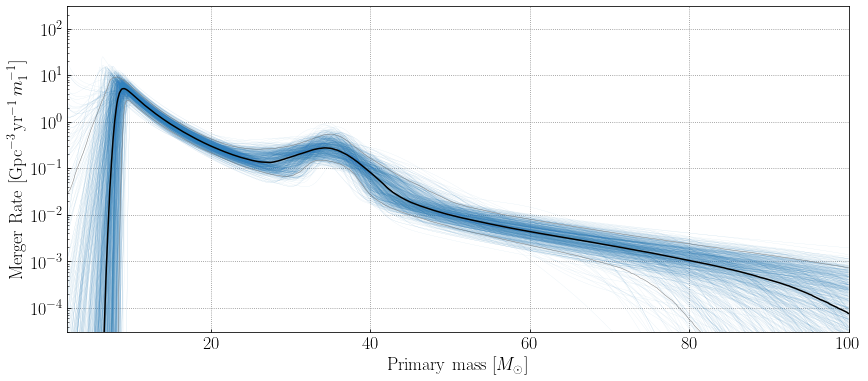

In [6]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]

# Grid over which to evaluate masses
mass_grid = np.linspace(1,100,1000)
dR_dm1 = np.zeros((R_ref.size,mass_grid.size))
for i in range(R_ref.size):
    
    # Compute dependence of merger rate on primary mass
    # Note that we need to normalize to m1=20, according to our definition of R_ref
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])/f_m1_norm
    
    # Combine
    # Note that, through the definition of R_ref, this is already defined at z=0.2
    # This time we *do not* multiply by `mass_grid`
    dR_dm1[i,:] = R_ref[i]*f_m1

fig,ax = plt.subplots(figsize=(14,6))

for i in np.random.choice(range(mu_m1.size),750):
    ax.plot(mass_grid,dR_dm1[i,:],color='#3182bd',alpha=0.25,lw=0.15)
    
ax.plot(mass_grid,np.median(dR_dm1,axis=0),color='black')
ax.plot(mass_grid,np.quantile(dR_dm1,0.05,axis=0),color='grey',lw=0.5)
ax.plot(mass_grid,np.quantile(dR_dm1,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(2,100)
ax.set_ylim(3e-5,3e2)
ax.set_yscale('log')
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel('Primary mass [$M_\odot$]',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,m_1^{-1}$]',fontsize=18)

plt.show()

We could instead plot the normalized probability distributions instead of merger rates. The following, for instance, is the probability distribution over $m_1$:

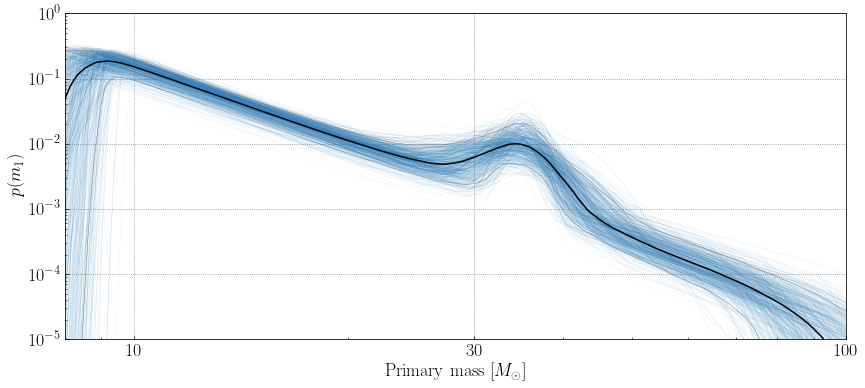

In [7]:
# Extract things from the hdf file
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]

# Grid over which to evaluate masses
mass_grid = np.linspace(5,100,1000)
p_lnm1 = np.zeros((alpha.size,mass_grid.size))
for i in range(R_ref.size):
    
    # Compute dependence of merger rate on primary mass
    p_m1_unnormed = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    
    # Normalize and multiply by m1 to obtain p_lnm1
    p_lnm1[i,:] = p_m1_unnormed/np.trapz(p_m1_unnormed,mass_grid)

fig,ax = plt.subplots(figsize=(14,6))

for i in np.random.choice(range(mu_m1.size),750):
    ax.plot(mass_grid,p_lnm1[i,:],color='#3182bd',alpha=0.25,lw=0.15)
    
ax.plot(mass_grid,np.median(p_lnm1,axis=0),color='black')
ax.plot(mass_grid,np.quantile(p_lnm1,0.05,axis=0),color='grey',lw=0.5)
ax.plot(mass_grid,np.quantile(p_lnm1,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(8,100)
ax.set_ylim(1e-5,1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([10,30,100])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel('Primary mass [$M_\odot$]',fontsize=18)
ax.set_ylabel('$p(m_1)$',fontsize=18)

plt.show()

### 2. Redshifts

Plot the evolution of the merger rate $\frac{d\mathcal{R}}{dm_1}$ across redshift, evaluated at fixed $m_1 = 20\,M_\odot$.

In [8]:
rateData_MD = np.load('../input/delayedRateDataMD.npy', allow_pickle=True)[()]
formationRates_MD = rateData_MD['formationRates']
tdelays_MD = rateData_MD['tds']
zformation_MD = rateData_MD['formationRedshifts']
zs_MD = rateData_MD['zs']

In [11]:
def R_norm_MD(zs, metMin_td, lambda_td, tdmin):
    fs = gammainc(0.84,(metMin_td**2.)*np.power(10.,0.3*zformation_MD))
    weightedFormationRates_MD = formationRates_MD*fs

    dpdt = np.power(tdelays_MD,lambda_td)
    dpdt[tdelays_MD<tdmin] = 0.
    dpdt[tdelays_MD>13.5] = 0.
    mergerRate_MD = weightedFormationRates_MD.dot(dpdt)

    R = mergerRate_MD
    f = interpolate.interp1d(zs, R)
    norm = f(0.2)
    return R, norm

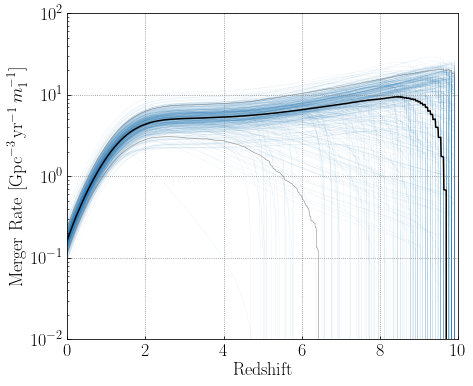

In [12]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
td_min = hdata['posterior/td_min'][()]
kappa = hdata['posterior/kappa'][()]
Zmax = hdata['posterior/Zmax'][()]

# Grid over which to evaluate R(z)
R_zs = np.zeros((R_ref.size,zs_MD.size))

for i in range(R_ref.size):
    
    # Now extend across all redshifts according to our time-delay model
    merger_rate_tmp, rate_02_tmp = R_norm_MD(zs_MD, Zmax[i], kappa[i], td_min[i])
    R_zs[i,:] = R_ref[i]*merger_rate_tmp/rate_02_tmp

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(R_zs.shape[0]),500):
    ax.plot(zs_MD,R_zs[i,:],color='#3182bd',alpha=0.25,lw=0.15,zorder=0)

ax.plot(zs_MD,np.median(R_zs,axis=0),color='black')
ax.plot(zs_MD,np.quantile(R_zs,0.05,axis=0),color='grey',lw=0.5)
ax.plot(zs_MD,np.quantile(R_zs,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,10)
ax.set_ylim(1e-2,1e2)
ax.set_yscale('log')
ax.set_xlabel('Redshift',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,m_1^{-1}$]',fontsize=18)

plt.show()